In [44]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import PIL
import pathlib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


### Load and explore dataset.

In [45]:
dataset = tf.keras.utils.image_dataset_from_directory(
  'flower_photos', batch_size=500,
  image_size=(256, 256))

Found 3670 files belonging to 5 classes.


### Create a training dataset

In [46]:
training_ds = tf.keras.utils.image_dataset_from_directory(
  'flower_photos',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(256, 256))

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


### Create a validation dataset

In [47]:
validation_ds = tf.keras.utils.image_dataset_from_directory(
 'flower_photos',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(256, 256))

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


### Print class names of training dataset

In [48]:
class_names = training_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


### Visualise training dataset

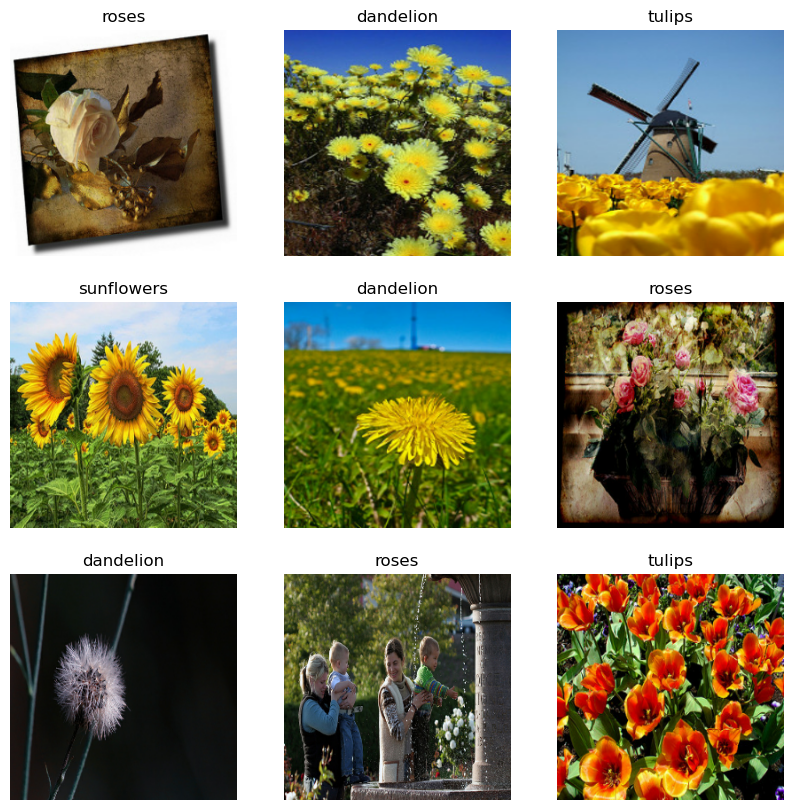

In [49]:
plt.figure(figsize=(10, 10))
for images, labels in training_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### Retrieve batches of images

In [50]:
for image_batch, labels_batch in training_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


### Configure dataset for performance

In [51]:
AUTOTUNE = tf.data.AUTOTUNE

training_ds = training_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Standardize data

In [55]:
normalization_layer = layers.Rescaling(1./255)


### Create model

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [60]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(256, 256, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compile the model

In [61]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Model summary

In [63]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_9 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 128, 128, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 64, 64, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 64, 64, 64)       

### Train the model

In [64]:
epochs=10
history = model.fit(
  training_ds,
  validation_data=validation_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 27s 278ms/step - loss: 1.3458 - accuracy: 0.4227 - val_loss: 1.0739 - val_accuracy: 0.5858
Epoch 2/10
92/92 [==============================] - 25s 265ms/step - loss: 0.9632 - accuracy: 0.6219 - val_loss: 0.9469 - val_accuracy: 0.6199
Epoch 3/10
92/92 [==============================] - 24s 262ms/step - loss: 0.7462 - accuracy: 0.7231 - val_loss: 0.8788 - val_accuracy: 0.6567
Epoch 4/10
92/92 [==============================] - 23s 252ms/step - loss: 0.4601 - accuracy: 0.8386 - val_loss: 0.9314 - val_accuracy: 0.6458
Epoch 5/10
92/92 [==============================] - 23s 252ms/step - loss: 0.2373 - accuracy: 0.9227 - val_loss: 1.1269 - val_accuracy: 0.6294
Epoch 6/10
92/92 [==============================] - 23s 247ms/step - loss: 0.1038 - accuracy: 0.9724 - val_loss: 1.5037 - val_accuracy: 0.6417
Epoch 7/10
92/92 [==============================] - 22s 244ms/step - loss: 0.0670 - accuracy: 0.9792 - val_loss: 1.4404 - val_accuracy: 0.6526

### Visualise training results

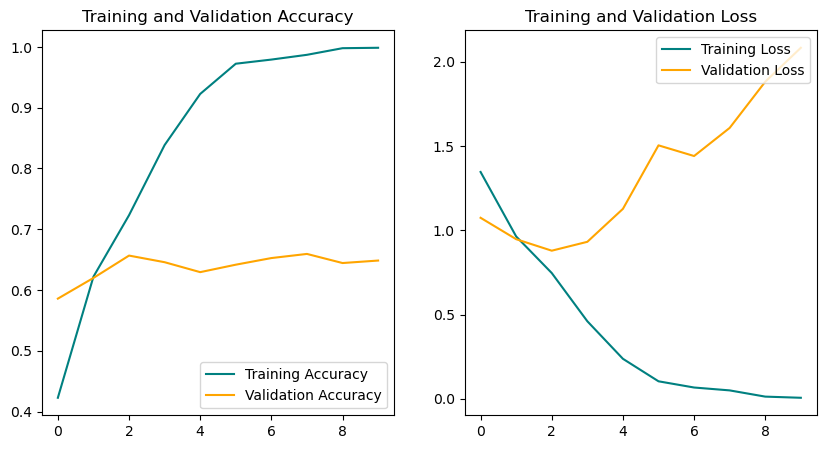

In [70]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc,color='teal', label='Training Accuracy')
plt.plot(epochs_range, val_acc,color='orange', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')



plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, color='teal', label='Training Loss')
plt.plot(epochs_range, val_loss, color='orange', label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The plots above shows serious signs of overfitting which affects the everythin

## Data Augmentation

In [71]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(256,
                                  256,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

### Visualise augmented examples

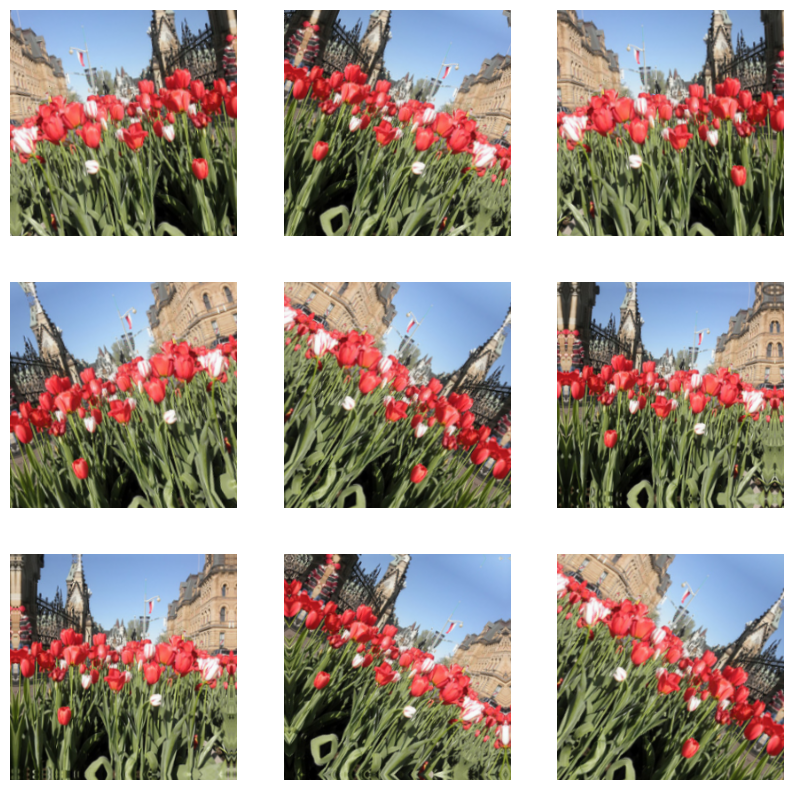

In [72]:
plt.figure(figsize=(10, 10))
for images, _ in training_ds.take(2):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [77]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

### Compile and train model

In [78]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [79]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_9 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 rescaling_11 (Rescaling)    (None, 256, 256, 3)       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 128, 128, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 64, 64, 32)        0         
 ng2D)                                               

In [80]:
epochs = 15
hist = model.fit(
  training_ds,
  validation_data=validation_ds,
  epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 23s 241ms/step - loss: 1.4754 - accuracy: 0.3856 - val_loss: 1.2052 - val_accuracy: 0.5245
Epoch 2/15
92/92 [==============================] - 24s 259ms/step - loss: 1.0872 - accuracy: 0.5525 - val_loss: 1.0873 - val_accuracy: 0.5940
Epoch 3/15
92/92 [==============================] - 26s 282ms/step - loss: 0.9828 - accuracy: 0.6141 - val_loss: 1.0089 - val_accuracy: 0.6172
Epoch 4/15
92/92 [==============================] - 27s 289ms/step - loss: 0.9278 - accuracy: 0.6274 - val_loss: 0.8873 - val_accuracy: 0.6403
Epoch 5/15
92/92 [==============================] - 29s 313ms/step - loss: 0.8708 - accuracy: 0.6505 - val_loss: 0.8195 - val_accuracy: 0.6785
Epoch 6/15
92/92 [==============================] - 30s 330ms/step - loss: 0.8098 - accuracy: 0.6853 - val_loss: 0.8151 - val_accuracy: 0.6757
Epoch 7/15
92/92 [==============================] - 33s 357ms/step - loss: 0.7743 - accuracy: 0.6941 - val_loss: 0.8456 - val_accuracy: 0.6662

### Visualise new training results

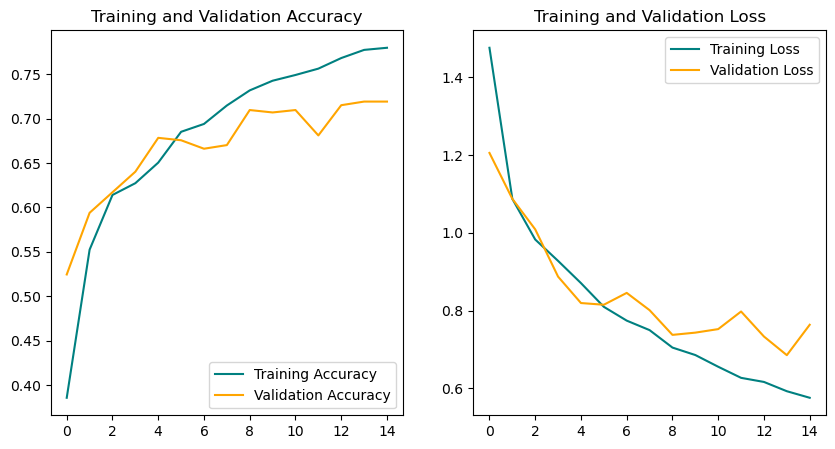

In [81]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc,color='teal', label='Training Accuracy')
plt.plot(epochs_range, val_acc,color='orange', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')



plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, color='teal', label='Training Loss')
plt.plot(epochs_range, val_loss, color='orange', label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()